In [89]:
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud

import re
import string
from nltk.corpus import stopwords

url='https://drive.google.com/file/d/0BwT5wj_P7BKXUl9tOUJWYzVvUjA/view?resourcekey=0-uFrn8bQkUfSCvJlmtKGCdQ'
url_='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url_)

In [90]:
df.shape

(216930, 7)

In [91]:
df.columns

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')

In [92]:
Counter( df[' Category'])

Counter({'BEFORE & AFTER': 547,
         'SCIENCE': 519,
         'LITERATURE': 496,
         'AMERICAN HISTORY': 418,
         'POTPOURRI': 401,
         'WORLD HISTORY': 377,
         'WORD ORIGINS': 371,
         'COLLEGES & UNIVERSITIES': 351,
         'HISTORY': 349,
         'SPORTS': 342,
         'U.S. CITIES': 339,
         'WORLD GEOGRAPHY': 338,
         'BODIES OF WATER': 327,
         'ANIMALS': 324,
         'STATE CAPITALS': 314,
         'BUSINESS & INDUSTRY': 311,
         'ISLANDS': 301,
         'WORLD CAPITALS': 300,
         'U.S. GEOGRAPHY': 299,
         'RELIGION': 297,
         'SHAKESPEARE': 294,
         'OPERA': 294,
         'LANGUAGES': 284,
         'BALLET': 282,
         'TELEVISION': 281,
         'FICTIONAL CHARACTERS': 280,
         'TRANSPORTATION': 279,
         'PEOPLE': 279,
         'RHYME TIME': 279,
         'ART & ARTISTS': 270,
         'STUPID ANSWERS': 270,
         'THE BIBLE': 267,
         'ART': 258,
         'BOOKS & AUTHORS': 255,
  

In [93]:
special_category = df[(df[' Category'] == 'BEFORE & AFTER') | (df[' Category'] == 'SCIENCE') | (df[' Category'] == 'LITERATURE')]
special_category = special_category[ [' Category', ' Question']]
special_category.dropna()
special_category.reset_index(inplace=True)
special_category[' Question']

0       At sea level at 70 degrees this travels 1,129 ...
1       The largest tree, the General Sherman in Calif...
2       (<a href="http://www.j-archive.com/media/2006-...
3       6 elements once known as inert gases are now k...
4       (<a href="http://www.j-archive.com/media/2006-...
                              ...                        
1557    It's the element whose atomic weight is closes...
1558    Inventors of these include Georges Leclanche, ...
1559    Life here was the subject of the 1965 book "Wo...
1560    After 1,400 orbits it fell back to Earth Janua...
1561    In 1977 the U.S. banned these that used freon ...
Name:  Question, Length: 1562, dtype: object

In [94]:
def clean_text(text):
    stop_words = stopwords.words("english")
    text = text.lower()
    text = re.sub(r"@\S+", " ", text)
    text = re.sub(r"href*\S+", " ", text)
    text = re.sub(r"target*\S+", " ", text)
    text = re.sub(r"#\S+", " ", text)
    text = re.sub(r"\d", " ", text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\s{2,}',' ', text)
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text

for index in range(len(special_category)):
    special_category.loc[index, ' Question'] = clean_text(special_category[' Question'].values[index])

print(special_category[' Question'])

0       sea level degrees travels feet per second spee...
1       largest tree general sherman california type a...
2        clue crew reads pole vault duke university tr...
3        elements known inert gases known aristocratic...
4        honey colored retriever named max tries lick ...
                              ...                        
1557    element whose atomic weight closest atomic number
1558    inventors include georges leclanche gaston pla...
1559                 life subject book world without sun 
1560                orbits fell back earth january burned
1561                       u banned used freon propellant
Name:  Question, Length: 1562, dtype: object


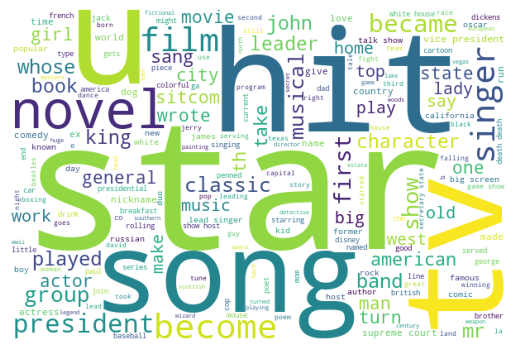

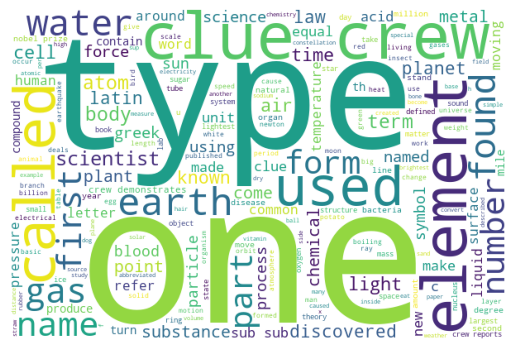

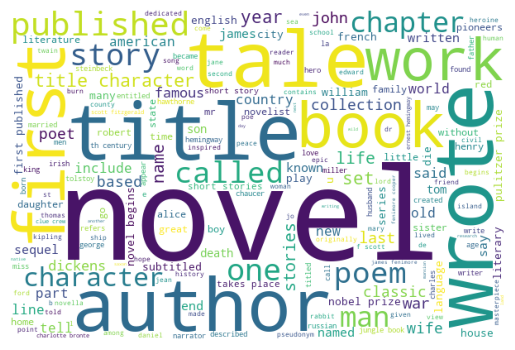

In [95]:
def visualize(label):
    text = ''
    for msg in special_category[special_category[' Category'] == label][' Question']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

visualize('BEFORE & AFTER')
visualize('SCIENCE')
visualize('LITERATURE')

In [96]:
X_train, X_test, y_train, y_test = train_test_split(special_category[' Question'], special_category[' Category'], test_size=0.20)

In [97]:
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [98]:
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_transformed, y_train)
y_pred = clf.predict(X_test_transformed)
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

BEFORE & AFTER       0.88      0.73      0.80       122
    LITERATURE       0.74      0.92      0.82        88
       SCIENCE       0.87      0.86      0.87       103

      accuracy                           0.83       313
     macro avg       0.83      0.84      0.83       313
  weighted avg       0.84      0.83      0.83       313



In [99]:
print(confusion_matrix(y_test, y_pred))

[[89 21 12]
 [ 6 81  1]
 [ 6  8 89]]
